# Data Pre-Processing: assignment #8 - Summer Holidays Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import json
import apply_preprocessing_8 as apply_pp 
from sklearn import tree 
from sklearn.linear_model import LogisticRegression , LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

import pickle
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## BUSINESS CASE AND DETAILS : [Description and details](https://www.kaggle.com/datasets/yasserh/loan-default-dataset?resource=download)

In [2]:
#Read Dataset
Dataset = pd.read_csv('Dataset/Loan_Default.csv',sep = ',')
Dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
#Data type trasformation 

Dataset['year'] = Dataset['year'].astype('datetime64[ns]')

In [4]:
Dataset = pd.DataFrame(Dataset)
Dataset['year'] = Dataset['year'].dt.year

In [5]:
#Dataset columns
Dataset.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
#Data set size
Dataset.shape

(148670, 34)

In [7]:
#Count Nan values
Dataset.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
#Data types 
Dataset.dtypes.value_counts()

object     21
float64     8
int64       5
dtype: int64

In [9]:
#Data types 
#Dataset.dtypes

In [10]:
 X_train, y_train = Dataset.drop(columns='Status'), Dataset['Status'] 

In [11]:
 X_train_numeric_data = X_train.select_dtypes(include=[np.number])  

In [12]:
from sklearn.impute import KNNImputer 

In [13]:
X_train_numeric_data

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,24890,1970,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,45.0
1,24891,1970,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,NaN
2,24892,1970,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,46.0
3,24893,1970,456500,4.250,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,42.0
4,24894,1970,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,1970,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,659,71.792763,48.0
148666,173556,1970,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,569,74.428934,15.0
148667,173557,1970,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,702,61.332418,49.0
148668,173558,1970,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,737,70.683453,29.0


In [14]:
#Handle missing values numerical variables 

Dataset['rate_of_interest'] = Dataset['rate_of_interest'].fillna(Dataset['rate_of_interest'].mean())
Dataset['Interest_rate_spread'] = Dataset['Interest_rate_spread'].fillna(Dataset['Interest_rate_spread'].mean())
Dataset['Upfront_charges'] = Dataset['Upfront_charges'].fillna(Dataset['Upfront_charges'].mean())
Dataset['term'] = Dataset['term'].fillna(Dataset['term'].mean())
Dataset['property_value'] = Dataset['property_value'].fillna(Dataset['property_value'].mean())
Dataset['income'] = Dataset['income'].fillna(Dataset['income'].mean())
Dataset['LTV'] = Dataset['LTV'].fillna(Dataset['LTV'].mean())
Dataset['dtir1'] = Dataset['dtir1'].fillna(Dataset['dtir1'].mean())

In [15]:
#Handle missing values categorical variables 

Dataset['Neg_ammortization'] = Dataset['Neg_ammortization'].fillna(Dataset['Neg_ammortization'].mode()[0])
Dataset['submission_of_application'] = Dataset['submission_of_application'].fillna(Dataset['submission_of_application'].mode()[0])
Dataset['loan_limit'] = Dataset['loan_limit'].fillna(Dataset['loan_limit'].mode()[0])
Dataset['loan_purpose'] = Dataset['loan_purpose'].fillna(Dataset['loan_purpose'].mode()[0])
Dataset['age'] = Dataset['age'].fillna(Dataset['age'].mode()[0])
Dataset['approv_in_adv'] = Dataset['approv_in_adv'].fillna(Dataset['approv_in_adv'].mode()[0])

In [16]:
Dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,1970,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,1970,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,24892,1970,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,1970,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,1970,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


In [17]:
Dataset.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

### Data Analisis ( Basic )

In [18]:
Dataset.head(5) 

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,1970,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,1970,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,24892,1970,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,1970,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,1970,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


In [19]:
Dataset.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [20]:
#modes

#clients who optained loan
client_optained_loan = Dataset[Dataset['Status']== 1]
Mode_client_optained_loan = client_optained_loan.mode()


#clients who NON  optained loan
client_NO_client_optained_loan = Dataset[Dataset['Status'] == 0]
Mode_client_NO_client_optained_loan = client_NO_client_optained_loan.mode()


In [21]:
print("The clients who optained frequenly loan : \n")
Mode_client_optained_loan.iloc[:1]

The clients who optained frequenly loan : 



,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,1970.0,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,668.0,EXP,45-54,to_inst,72.746457,south,direct,1.0,37.732932


In [22]:
print("The clients who didn't optained frequenly loan : \n")
Mode_client_NO_client_optained_loan.iloc[:1]

The clients who didn't optained frequenly loan : 



,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24892,1970.0,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,CIB,763.0,CIB,45-54,to_inst,81.25,North,direct,0.0,37.732932


<AxesSubplot:>

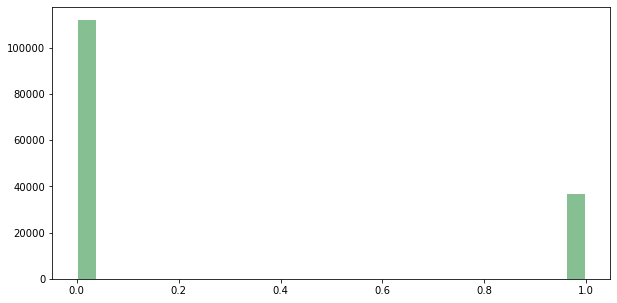

In [23]:
#Ploting
Dataset['Status'].hist(bins=25, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9)

Normal distribution of clients who optained credit based on their Ages :
 


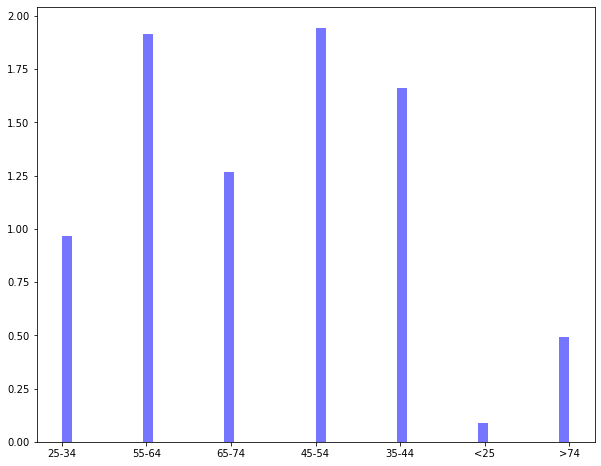

In [24]:
# Plotting the histogram.
print('Normal distribution of clients who optained credit based on their Ages :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_optained_loan
plt.hist(Dataset_test['age'], bins=50, density=True, alpha=0.9, color='#6666FF')
  
plt.show()

Normal distribution of clients who optained credit based on their Gender :
 


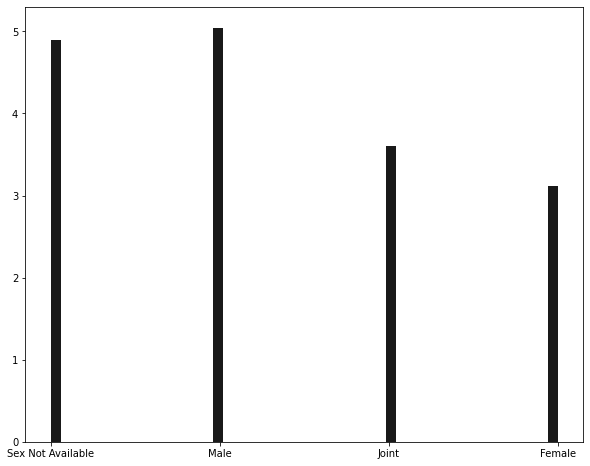

In [25]:
# Plotting the histogram.
print('Normal distribution of clients who optained credit based on their Gender :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_optained_loan
plt.hist(Dataset_test['Gender'], bins=50, density=True, alpha=0.9, color='black')
  
plt.show()

Normal distribution of clients who optained credit based on their Region :
 


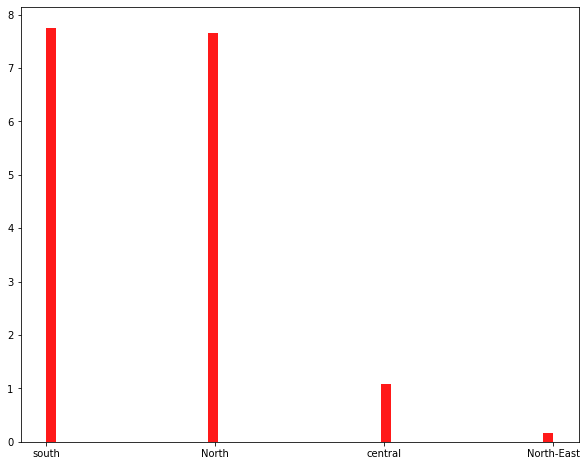

In [26]:
# Plotting the histogram.
print('Normal distribution of clients who optained credit based on their Region :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_optained_loan
plt.hist(Dataset_test['Region'], bins=50, density=True, alpha=0.9, color='red')
  
plt.show()

Normal distribution of clients who optained credit based on their submission_of_application :
 


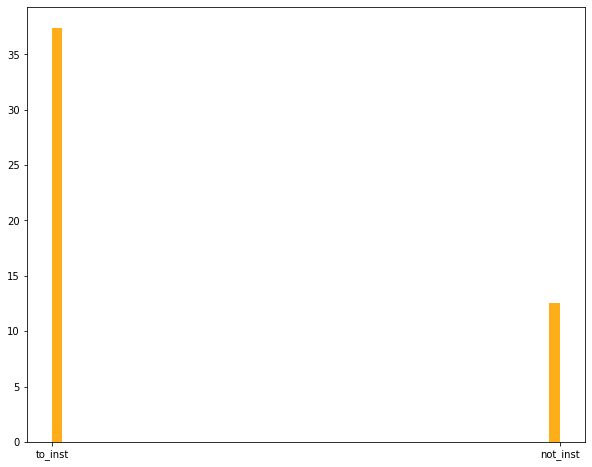

In [27]:
# Plotting the histogram.
print('Normal distribution of clients who optained credit based on their submission_of_application :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_optained_loan
plt.hist(Dataset_test['submission_of_application'], bins=50, density=True, alpha=0.9, color='orange')
  
plt.show()

Normal distribution of clients who optained credit based on their credit_type :
 


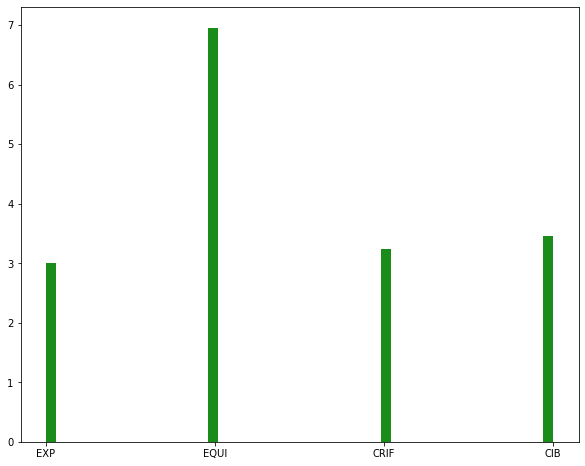

In [28]:
# Plotting the histogram.
print('Normal distribution of clients who optained credit based on their credit_type :\n ')

plt.figure(figsize=(10,8))
Dataset_test = client_optained_loan
plt.hist(Dataset_test['credit_type'], bins=50, density=True, alpha=0.9, color='green')
  
plt.show()

## Preprossessing ( Offline training ) 

In [29]:
#Data spliting 
train, test = train_test_split(Dataset, shuffle=True, test_size=0.2, random_state=50)
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [30]:
train.shape , Dataset.shape

((118936, 34), (148670, 34))

In [31]:
# Using vesion V1 ,V2,V3,V4

pp_X_train , pp_y_train  = apply_pp.apply_preprocessing(train,is_training=True)  

In [32]:
pp_X_train.shape , pp_y_train.shape

((118936, 33), (118936, 1))

In [33]:
pp_X_train.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
44621,69511,1970,306500,2.990,0.0056,1290.72,360.0,348000.0,5400.000000,877,...,sb,pr,home,1U,CRIF,CIB,35-44,not_inst,North,direct
109401,134291,1970,196500,4.375,0.6472,2521.99,240.0,258000.0,10320.000000,613,...,sb,pr,home,1U,EXP,EXP,45-54,to_inst,south,direct
56165,81055,1970,596500,3.875,0.1920,0.00,360.0,868000.0,12900.000000,504,...,sb,pr,home,1U,CIB,CIB,25-34,not_inst,North,direct
55663,80553,1970,246500,3.500,-0.0373,600.01,360.0,238000.0,6957.338876,884,...,sb,pr,home,1U,EXP,EXP,>74,to_inst,North,direct
136029,160919,1970,156500,3.990,0.4495,2979.13,360.0,288000.0,1980.000000,617,...,sb,pr,home,1U,CRIF,CIB,55-64,to_inst,south,direct


In [34]:
pp_X_train.columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

### Build Model

In [35]:
#y_train = pp_y_train # To retrieve our features 

In [36]:
#y_train.shape , Dataset.shape , pp_X_train.shape

In [37]:
modelTree = LinearRegression()
modelTree.fit(pp_X_train , pp_y_train)
accuracyTreeTrain = modelTree.score(pp_X_train,pp_y_train)
print('Accuracy DECISION TREE x_train : ', round(accuracyTreeTrain*100,2),'%')

ValueError: could not convert string to float: 'cf'

In [ ]:
# Save/serialize the fitted model to local OS
with open('pickle/model.pkl', 'wb') as output_file:
    pickle.dump(model, output_file)